In [242]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import joblib as jb
import warnings
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')


In [243]:
data = pd.read_csv('Mobile-Phones.csv')
data.head()

,brand,model,sd_card,main_camera,resolution,display,sim_card,os,color,region,location,screen_size(inch),battery(mAh),storage(GB),ram(GB),selfie_camera(MP),price(¢)
0,Samsung,Galaxy S10,yes,"3 Cameras: 12, 12, 16 MP",1440 x 3040,AMOLED,Single,Android,White,Greater Accra,Circle,6.10,3400.0,128.0,8.0,10.0,2450.0
1,Samsung,Galaxy Note 20 Ultra,yes,"3 Cameras: 108, 12, 12 MP",1440 x 3088,AMOLED,Dual,Android,Bronze,Greater Accra,Circle,6.90,4500.0,128.0,12.0,10.0,5000.0
2,Samsung,Galaxy A54 5G,yes,"3 Cameras: 50, 12, 5 MP",1080 x 2340,Super AMOLED,Dual,Android,Black,Greater Accra,Accra Metropolitan,6.40,5000.0,256.0,8.0,32.0,3000.0
3,Tecno,Camon 20 Pro,no,"2 Cameras: 64, 2 MP",1080 x 2400,AMOLED,Dual,Android,Black,Greater Accra,Accra Metropolitan,6.67,5000.0,256.0,8.0,32.0,1900.0
4,Samsung,Galaxy S22 Ultra,no,"4 Cameras: 108, 10, 10, 12 MP",1400 x 3088,AMOLED,Dual,Android,Black,Greater Accra,Accra Metropolitan,6.80,5000.0,512.0,12.0,40.0,5750.0


In [244]:
df = data
df.head(2)

,brand,model,sd_card,main_camera,resolution,display,sim_card,os,color,region,location,screen_size(inch),battery(mAh),storage(GB),ram(GB),selfie_camera(MP),price(¢)
0,Samsung,Galaxy S10,yes,"3 Cameras: 12, 12, 16 MP",1440 x 3040,AMOLED,Single,Android,White,Greater Accra,Circle,6.1,3400.0,128.0,8.0,10.0,2450.0
1,Samsung,Galaxy Note 20 Ultra,yes,"3 Cameras: 108, 12, 12 MP",1440 x 3088,AMOLED,Dual,Android,Bronze,Greater Accra,Circle,6.9,4500.0,128.0,12.0,10.0,5000.0


In [245]:
# df.isnull().sum()

In [246]:
cat = df.select_dtypes(exclude = "number")
num = df.select_dtypes(include = 'number')

print('Numerical Data')
display(num.head())
print(f'\n\nCategorical Data')
display(cat.head())

Numerical Data


,screen_size(inch),battery(mAh),storage(GB),ram(GB),selfie_camera(MP),price(¢)
0,6.10,3400.0,128.0,8.0,10.0,2450.0
1,6.90,4500.0,128.0,12.0,10.0,5000.0
2,6.40,5000.0,256.0,8.0,32.0,3000.0
3,6.67,5000.0,256.0,8.0,32.0,1900.0
4,6.80,5000.0,512.0,12.0,40.0,5750.0




Categorical Data


,brand,model,sd_card,main_camera,resolution,display,sim_card,os,color,region,location
0,Samsung,Galaxy S10,yes,"3 Cameras: 12, 12, 16 MP",1440 x 3040,AMOLED,Single,Android,White,Greater Accra,Circle
1,Samsung,Galaxy Note 20 Ultra,yes,"3 Cameras: 108, 12, 12 MP",1440 x 3088,AMOLED,Dual,Android,Bronze,Greater Accra,Circle
2,Samsung,Galaxy A54 5G,yes,"3 Cameras: 50, 12, 5 MP",1080 x 2340,Super AMOLED,Dual,Android,Black,Greater Accra,Accra Metropolitan
3,Tecno,Camon 20 Pro,no,"2 Cameras: 64, 2 MP",1080 x 2400,AMOLED,Dual,Android,Black,Greater Accra,Accra Metropolitan
4,Samsung,Galaxy S22 Ultra,no,"4 Cameras: 108, 10, 10, 12 MP",1400 x 3088,AMOLED,Dual,Android,Black,Greater Accra,Accra Metropolitan


In [271]:
df['brand'] = df['brand'].astype('category')

In [247]:
# df = data.drop('Apple')
# df.head()

In [248]:
# for i in df.columns:
#     if ((df[i].isnull().sum() / len(df)) * 100) < 30:
#         if df[i].dtypes != 'O':
#             df[i].fillna(df[i].median(), inplace = True)
#         else:
#             df[i].fillna(df[i].mode()[0], inplace = True)
#     else:
#         df.drop(i, axis = 1, inplace = True)

# df.isnull().sum()

In [249]:
# brand_model_counts = df.groupby(['brand', 'model']).size().reset_index(name ='Counts')
# brand_model_counts

In [250]:
# LABEL ENCODE THE CATEGORICAL COLUMNS
import joblib
from sklearn.preprocessing import LabelEncoder

encoded = {}  # ................................................................ Have a dictionary to save the encoders
for i in cat.columns: # ........................................................ Iterate through the new_categorical variables
    encode = LabelEncoder() # .................................................. Instantiate the encoder transformer
    df[i] = encode.fit_transform(df[i]) # ...................................... Encode the columns in ech iteration
    joblib.dump(encode, open(f'{i}_encoder.pkl', 'wb')) # ...................... Save the transformer to file for future reusaldf[i] = encode.fit_transform(df[i]) # ...................................... Encode the columns in ech iteration
    encoded[i +'_encoder'] = encode # .......................................... Save the transformer to the above stated dictionary for easy access

encoded

{'brand_encoder': LabelEncoder(),
 'model_encoder': LabelEncoder(),
 'sd_card_encoder': LabelEncoder(),
 'main_camera_encoder': LabelEncoder(),
 'resolution_encoder': LabelEncoder(),
 'display_encoder': LabelEncoder(),
 'sim_card_encoder': LabelEncoder(),
 'os_encoder': LabelEncoder(),
 'color_encoder': LabelEncoder(),
 'region_encoder': LabelEncoder(),
 'location_encoder': LabelEncoder()}

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

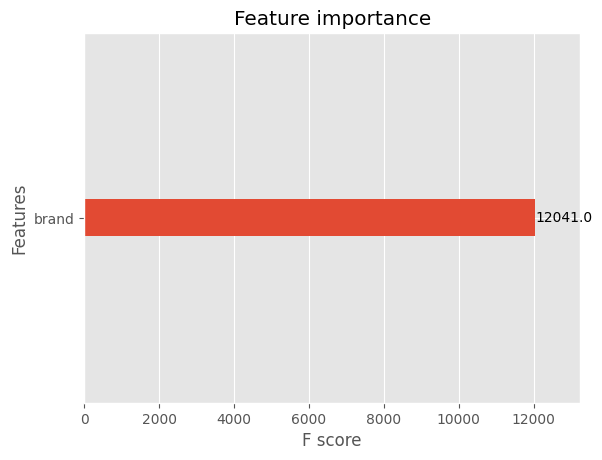

In [251]:
# conduct Feature Selection
# - Using XGBOOST to find feature importance

import matplotlib.pyplot as plt
import xgboost as xgb

model = xgb.XGBClassifier()

x = df.brand
y = df.model

model.fit(x, y)

# Print feature importance scores
xgb.plot_importance(model, importance_type = 'weight')

In [252]:
# brand = ['Apple', 'Samsung', 'Google', 'Nokia', 'Huawei',
#             'Infinix', 'Motorola', 'Xiaomi']
# sel_cols = ['brand']

# new_data = df[sel_cols]
# new_data.head()

In [253]:
columns_to_scale = []
for i in new_num.columns:
    if df[i].describe()[2] > 1500:
        columns_to_scale.append(i)

columns_to_scale

['price(¢)']

In [254]:
df.shape

(3600, 17)

In [255]:
df['brand'].unique()

array([16, 17,  8, 18,  5,  6,  0,  2, 13, 11, 14,  7, 10, 15, 20,  9, 12,
        1,  3, 19,  4])

In [256]:
# brand = df.loc[df[0] == 'brand']
# model = df.loc[df[0] == 'model']

# brand = brand[1].reset_index(drop = True)
# model = model[1].reset_index(drop = True)

# new_df = pd.DataFrame()
# new_df['brand'] = brand
# new_df['model'] = model

# new_df.head()

In [257]:
import plotly.express as px

In [258]:
#fig = px.histogram(df, x = 'brand')
#fig.show()

In [259]:
# df.groupby('brand', 'model')

In [260]:
# brand_model_counts = df.groupby(['brand', 'model']).size().reset_index(name ='Counts')
# brand_model_counts

In [261]:
# brand_model_counts = df.groupby(['brand', 'model']).size().reset_index(name ='Counts')
# most_popular_model = brand_model_counts.groupby('brand')['Counts'].idxmax()
# most_popular_models_df = brand_model_counts.loc[most_popular_model]

# #Creating the bar chart...

# fig = px.bar(most_popular_models_df, x = 'brand', y = 'Counts', text = 'model', title = "Most Popular Phone Model for Each Brand in Ghana Phone Market")
# fig.show()

In [262]:
# sel_cols = ['Apple', 'Samsung', 'Google', 'Nokia', 'Huawei',
#             'Infinix', 'Motorola', 'Xiaomi']

# new_data = df[sel_cols]
# new_data.head()